In [85]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [334]:
def imageProcess(tem_photo):
    
    image = cv2.imread(tem_photo)
#     image = cv2.resize(image_raw, None, fx=0.5,fy=0.5)
    image = cv2.GaussianBlur(image,(3,3),0)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    output = image.copy()
    processed = gray
    
    return output, processed

In [419]:
output, processedPhoto = imageProcess('17.tif')

In [426]:
standard = cv2.HoughCircles(processedPhoto, 
                           cv2.HOUGH_GRADIENT,
                           dp = 1,
                           minDist = 212,
                           param1 = 210,
                           param2 = 26, 
                           minRadius = 106, 
                           maxRadius = 111) 

standard = standard[0, :]
df_standard = pd.DataFrame(standard, columns=['x', 'y', 'r'])
df_standard['r'].describe(percentiles=[.003, .997])

count      8.000000
mean     109.024994
std        1.281463
min      107.099998
0.3%     107.099998
50%      109.300003
99.7%    110.400002
max      110.400002
Name: r, dtype: float64

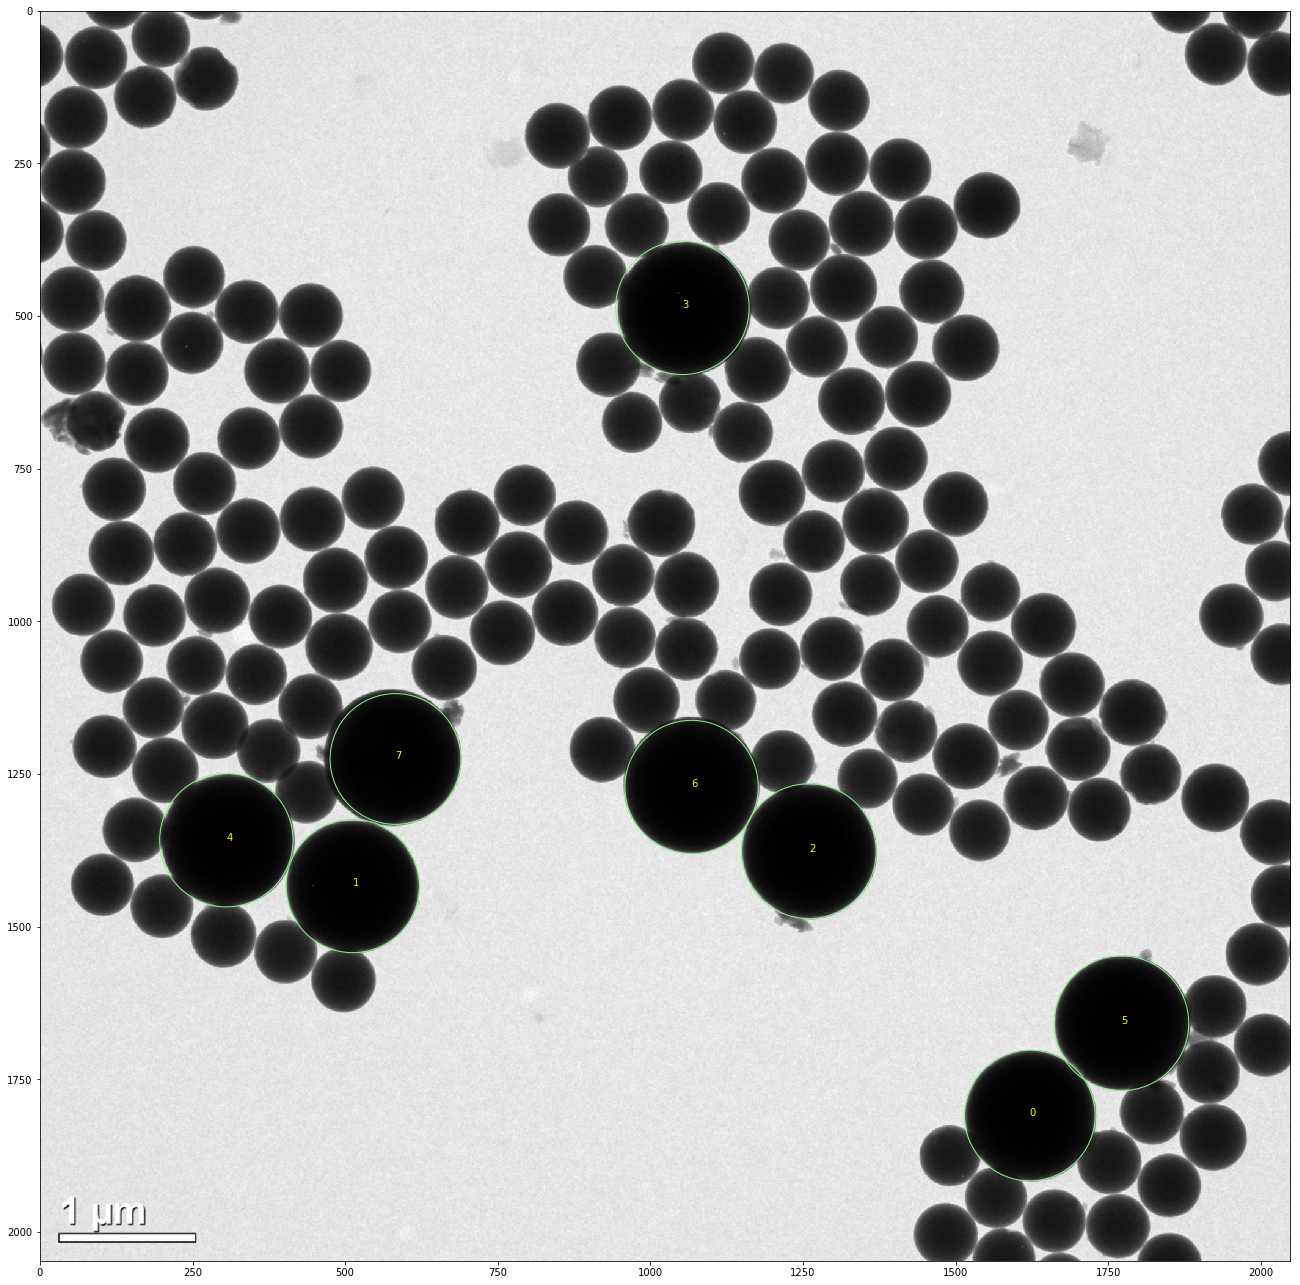

In [427]:
plt.figure(figsize=(23,23))
plt.imshow(output)
fig = plt.gcf()
ax = fig.gca()

i = 0
for (x, y, r) in standard:
    circle = plt.Circle((x, y), r, color='lightgreen', fill=False)
    ax.add_artist(circle)
    plt.text(x, y, i, color = 'yellow')
    i += 1

In [298]:
output, processedPhoto = imageProcess('19.tif')
def paramEval(param1):
    standard = cv2.HoughCircles(processedPhoto, 
                               cv2.HOUGH_GRADIENT,
                               dp = 1,
                               minDist = 200,
                               param1 = param1,
                               param2 = 25, 
                               minRadius = 102, 
                               maxRadius = 111) 

    standard = standard[0, :]
    df_standard_19 = pd.DataFrame(standard, columns=['x', 'y', 'r'])
    count = df_standard_19['r'].describe()[0]
    mean = df_standard_19['r'].describe()[1]
    min_r = df_standard_19['r'].describe()[3]
    max_r = df_standard_19['r'].describe()[-1]
    
    plt.figure(figsize=(20,20))
    plt.imshow(output)
    fig = plt.gcf()
    ax = fig.gca()

    i = 0
    for (x, y, r) in standard:
        circle = plt.Circle((x, y), r, color='lightgreen', fill=False)
        ax.add_artist(circle)
        plt.text(x, y, i, color = 'yellow')
        i += 1
        
    return param1, count, mean, min_r, max_r